## 任务要求

- 学习主题：作者关联（数据建模任务），对论文作者关系进行建模，统计最常出现的作者关系，构建作者关系图，挖掘作者关系

## 导入库并配置环境

In [1]:
import seaborn as sns 
import json 
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['axes.unicode_minus'] = False	
plt.rcParams['font.sans-serif'] = 'SimHei'
# 因为我的环境下背景为黑色，黑色字体看不清，这里换了下颜色
plt.rcParams["xtick.color"] = 'orange'
plt.rcParams["ytick.color"] = 'orange'
plt.rcParams["text.color"] = 'orange'

## 代码实现

In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('../arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors_parsed'],
                    200000)


创建作者链接的无向图

In [10]:
import networkx as nx 
# 创建无向图
G = nx.Graph()

# 选用15篇论文进行构建
for row in data.iloc[:15].itertuples():
    authors = row[2]
    authors = [' '.join(x[:-1]) for x in authors]
    
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

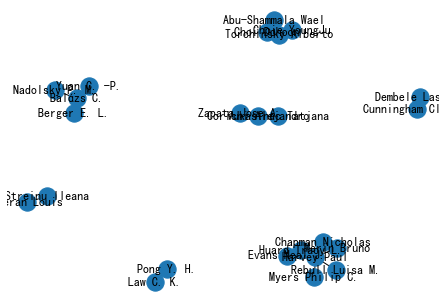

In [12]:
# 将作者关系图进行绘制：
nx.draw(G, with_labels=True)

In [17]:
try:
    print(nx.dijkstra_path(G, 'Pong Y. H.', 'Law C. K.'))
except:
    print('No path')

['Pong Y. H.', 'Law C. K.']


使用500篇论文构建图，得到更加完整作者关系。选择最大联通子图进行绘制，折线图为子图节点度值。

In [19]:
G = nx.Graph()

# 重新创建
for row in data.iloc[:500].itertuples():
    authors = row[2]
    authors = [' '.join(x[:-1]) for x in authors]
    
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

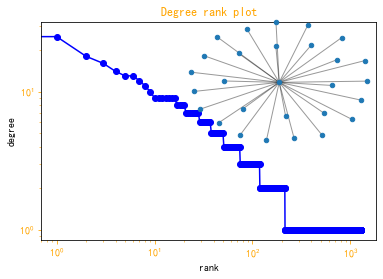

In [20]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()